In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import dataframe_image as dfi

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


import warnings
warnings.filterwarnings(action='ignore')

In [27]:
# 데이터프레임을 그림 파일로 저장
save_option = 1 # 1 : dfi / 2 : df2img / 3 : do nothing
import df2img
def savedf(df:pd.DataFrame, path:str):
    if save_option == 1:
        dfi.export(df, path)
    if save_option == 2:
        df2img.save_dataframe(fig=df2img.plot_dataframe(df), filename=path)
    if save_option == 3:
        pass

In [28]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:\Windows\Fonts\malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 데이터 불러오기 및 병합

In [29]:
collected_data = pd.read_csv('../../data/data_c_final/2c201_1230_collected_data.csv')
collected_data.set_index("지역", inplace=True)
collected_data.head()

,쏘카존 수,인구,2030인구,아파트 수,행복주택 수,지하철역 수,환승역 수,정류장 수,대학교 수,대학생 수,녹지,주거,공업,상업,위도,경도,면적
지역,,,,,,,,,,,,,,,,,
수원시 장안구,18,271012,82294.55980,200,0,1,0,409,4,34441,0.272727,0.727273,0.000000,0.000000,37.303971,127.001743,33.34
수원시 권선구,16,367004,111443.15610,159,1,4,0,537,1,11033,0.625000,0.312500,0.062500,0.000000,37.257687,126.963532,47.17
수원시 팔달구,20,192225,58370.37385,65,1,4,2,185,0,0,0.136364,0.409091,0.000000,0.454545,37.282570,127.011718,12.86
수원시 영통구,34,360127,109354.91020,129,3,6,0,380,21,22911,0.142857,0.571429,0.285714,0.000000,37.259600,127.042341,27.72
용인시 처인구,29,259872,67270.69540,112,1,9,0,1234,15,13084,0.823529,0.058824,0.000000,0.117647,37.234346,127.192965,467.65


In [30]:
# collected_data.sort_values(by='지역',inplace=True)
# collected_data['dumb'] = np.arange(len(collected_data))
# collected_data

In [31]:
hackathon_data_original = pd.read_csv("../../data/20211022_수요예측_hackathon_data.csv", encoding='cp949')
hackathon_data_original.head()

,region1,region2,reservation_return_at,reservation_start_at,age_group,gender,car_model
0,울산광역시,남구,2019-09-29 21:25:40+00:00,2019-09-29 19:20:00+00:00,1,male,경형
1,울산광역시,남구,2019-07-13 13:11:21+00:00,2019-07-13 11:00:00+00:00,1,male,준중형
2,울산광역시,남구,2019-09-16 23:43:08+00:00,2019-09-16 19:10:00+00:00,1,male,준중형
3,울산광역시,남구,2019-08-09 06:17:41+00:00,2019-08-09 00:20:00+00:00,1,male,준중형
4,울산광역시,남구,2019-07-24 12:36:29+00:00,2019-07-24 09:00:00+00:00,2,male,경형


In [32]:
hackathon_data = pd.DataFrame(hackathon_data_original['region2'].value_counts())
hackathon_data.reset_index(inplace=True)
hackathon_data['index'].replace({ 
    '수원시\u3000팔달구':'수원시 팔달구', '수원시\u3000영통구':'수원시 영통구', '용인시\u3000기흥구':'용인시 기흥구',
    '고양시\u3000일산동구':'고양시 일산동구', '안양시\u3000동안구':'안양시 동안구', '고양시\u3000일산서구':'고양시 일산서구',
    '성남시\u3000수정구':'성남시 수정구', '수원시\u3000장안구':'수원시 장안구', '성남시\u3000중원구':'성남시 중원구',
    '안산시\u3000단원구':'안산시 단원구', '용인시\u3000수지구':'용인시 수지구', '고양시\u3000덕양구':'고양시 덕양구',
    '용인시\u3000처인구':'용인시 처인구', '안양시\u3000만안구':'안양시 만안구', '성남시\u3000분당구':'성남시 분당구',
    '수원시\u3000권선구':'수원시 권선구', '안산시\u3000상록구':'안산시 상록구',}, inplace=True)
hackathon_data.columns = ['지역', '이용 수']
hackathon_data.set_index('지역', inplace=True)
hackathon_data.head()

,이용 수
지역,
성남시 분당구,46782
화성시,35249
고양시 일산동구,31906
남양주시,26546
고양시 덕양구,26253


In [33]:
intersected_rows = set.intersection(set(collected_data.index), set(hackathon_data.index))
intersected_rows = list(intersected_rows)
print(len(intersected_rows),'개 지역 \n',intersected_rows)

16 개 지역 
 ['성남시 분당구', '구리시', '남양주시', '하남시', '고양시 일산서구', '안양시 동안구', '안양시 만안구', '성남시 수정구', '고양시 덕양구', '김포시', '광명시', '성남시 중원구', '고양시 일산동구', '의정부시', '양평군', '화성시']


In [34]:
collected_data_intersected = collected_data[collected_data.index.isin(intersected_rows)]
collected_data_intersected.sort_index(ascending=True, inplace=True)
hackathon_data_intersected = hackathon_data[hackathon_data.index.isin(intersected_rows)]
hackathon_data_intersected.sort_index(ascending=True, inplace=True)
intersected = pd.concat([collected_data_intersected, hackathon_data_intersected],axis=1)
intersected['쏘카존 수 대비 이용 수'] = intersected['이용 수']/intersected['쏘카존 수']
intersected

,쏘카존 수,인구,2030인구,아파트 수,행복주택 수,지하철역 수,환승역 수,정류장 수,대학교 수,대학생 수,녹지,주거,공업,상업,위도,경도,면적,이용 수,쏘카존 수 대비 이용 수
지역,,,,,,,,,,,,,,,,,,,
고양시 덕양구,48,487874,131281.05900,274,8,9,2,1205,6,4210,0.656250,0.343750,0.000000,0.000000,37.637431,126.823745,165.00,26253,546.937500
고양시 일산동구,51,296590,79808.82212,133,0,6,0,454,1,13923,0.461538,0.461538,0.000000,0.076923,37.658622,126.771006,59.00,31906,625.607843
고양시 일산서구,29,290738,78234.11890,140,0,4,0,635,0,0,0.500000,0.375000,0.000000,0.125000,37.677991,126.741105,42.00,16052,553.517241
광명시,28,288182,76757.00000,89,0,3,0,445,0,0,0.222222,0.666667,0.000000,0.111111,37.478618,126.856271,38.50,22645,808.750000
구리시,19,188876,51033.00000,111,1,2,0,313,0,0,0.500000,0.500000,0.000000,0.000000,37.594266,127.121253,33.30,13011,684.789474
김포시,55,484194,127499.00000,229,7,9,0,1325,3,232,0.400000,0.533333,0.066667,0.000000,37.615350,126.707165,276.60,21500,390.909091
남양주시,57,737366,176762.00000,385,6,13,0,1803,2,8100,0.526316,0.473684,0.000000,0.000000,37.635985,127.212283,458.10,26546,465.719298
성남시 분당구,58,482026,137576.86410,231,0,12,3,694,1,0,0.500000,0.500000,0.000000,0.000000,37.382819,127.110546,69.49,46782,806.586207
성남시 수정구,18,232125,66251.67434,91,5,9,2,436,11,20021,0.631579,0.368421,0.000000,0.000000,37.450396,127.137254,45.98,18773,1042.944444


## 상관분석 (pearson correlation analysis)

In [35]:
correlation = intersected.corr()[['이용 수', '쏘카존 수 대비 이용 수']]
correlation['abs value'] = abs(correlation['이용 수'])
correlation.sort_values(by='abs value', ascending=False, inplace=True)
correlation.drop(columns = ['abs value'], inplace=True)
correlation.drop(index = ['이용 수', '쏘카존 수 대비 이용 수'], inplace=True)
correlation

,이용 수,쏘카존 수 대비 이용 수
쏘카존 수,0.806230,-0.537069
2030인구,0.686101,-0.334138
인구,0.649762,-0.390717
환승역 수,0.637355,0.078405
아파트 수,0.623385,-0.388349
경도,-0.393671,0.128923
주거,0.381949,0.060353
녹지,-0.369392,-0.148646
정류장 수,0.335510,-0.491441
지하철역 수,0.286200,-0.312177


In [36]:
correlation = correlation[['이용 수']]
correlation.columns = ['correlation']
correlation

,correlation
쏘카존 수,0.806230
2030인구,0.686101
인구,0.649762
환승역 수,0.637355
아파트 수,0.623385
경도,-0.393671
주거,0.381949
녹지,-0.369392
정류장 수,0.335510
지하철역 수,0.286200


In [37]:
savedf(correlation, "results/1b201_0112_correlation_analysis.png")
savedf(correlation.drop(index=['위도', '경도', '면적']), "results/1b202_0112_correlation_analysis_selected.png")

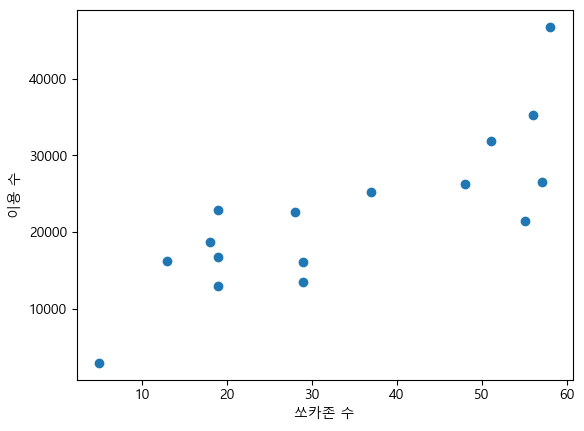

In [38]:
# 이용 수와 쏘카존 수 사이의 scatter plot
plt.xlabel('쏘카존 수')
plt.ylabel('이용 수')
plt.scatter(intersected['쏘카존 수'], intersected['이용 수'])
plt.show()

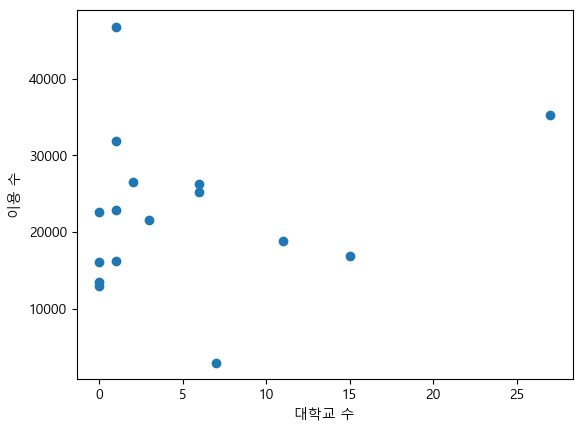

In [39]:
# 대학교 수와 쏘카존 수 사이의 scatter plot
plt.xlabel('대학교 수')
plt.ylabel('이용 수')
plt.scatter(intersected['대학교 수'], intersected['이용 수'])
plt.show()

## 회귀분석 (linear regression analysis)

## 회귀분석 (1)

In [40]:
# 독립변수 / 종속변수 설정
independents = intersected.copy()
independents = independents.drop(["이용 수", "쏘카존 수 대비 이용 수"], axis=1)
dependent = intersected["이용 수"]
independents.shape, dependent.shape

((16, 17), (16,))

In [41]:
# 위치 관련 feature 제거
independents = independents.drop(["위도", "경도", '면적'], axis=1)

In [42]:
# min max scaling
scaler = MinMaxScaler()
independents_scaled = scaler.fit_transform(independents.to_numpy())
independents_scaled = pd.DataFrame(independents_scaled, columns=independents.columns, index=independents.index)
independents_scaled.head()

,쏘카존 수,인구,2030인구,아파트 수,행복주택 수,지하철역 수,환승역 수,정류장 수,대학교 수,대학생 수,녹지,주거,공업,상업
지역,,,,,,,,,,,,,,
고양시 덕양구,0.811321,0.465198,0.460164,0.673352,0.470588,0.40,0.666667,0.363844,0.222222,0.210279,0.558036,0.458333,0.0,0.000000
고양시 일산동구,0.867925,0.221678,0.244822,0.269341,0.000000,0.25,0.000000,0.077422,0.037037,0.695420,0.307692,0.615385,0.0,0.615385
고양시 일산서구,0.452830,0.214228,0.238234,0.289398,0.000000,0.15,0.000000,0.146453,0.000000,0.000000,0.357143,0.500000,0.0,1.000000
광명시,0.433962,0.210974,0.232054,0.143266,0.000000,0.10,0.000000,0.073989,0.000000,0.000000,0.000000,0.888889,0.0,0.888889
구리시,0.264151,0.084549,0.124434,0.206304,0.058824,0.05,0.000000,0.023646,0.000000,0.000000,0.357143,0.666667,0.0,0.000000


In [43]:
# variance inflation factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    independents_scaled.values, i) for i in range(independents_scaled.shape[1])]
vif["features"] = independents_scaled.columns
vif.sort_values(by='VIF Factor', ascending=True)


,VIF Factor,features
12,2.164401,공업
9,2.947517,대학생 수
5,2.949862,지하철역 수
13,3.151894,상업
6,4.338011,환승역 수
0,5.266841,쏘카존 수
4,7.345213,행복주택 수
10,8.747568,녹지
8,10.304801,대학교 수
11,17.171673,주거


In [44]:
# feature 제거 1 : 인구, 2030인구
independents_scaled.drop(['인구', '2030인구'], axis=1, inplace=True)

In [45]:
# variance inflation factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    independents_scaled.values, i) for i in range(independents_scaled.shape[1])]
vif["features"] = independents_scaled.columns
vif.sort_values(by='VIF Factor', ascending=True)


,VIF Factor,features
10,1.716982,공업
4,1.765039,환승역 수
7,1.940247,대학생 수
11,1.969753,상업
3,2.298641,지하철역 수
0,4.505399,쏘카존 수
8,4.535790,녹지
6,4.966914,대학교 수
2,5.837759,행복주택 수
9,6.552860,주거


In [46]:
# feature 제거 2 : 아파트 수, 정류장 수
independents_scaled.drop(['정류장 수', '아파트 수'], axis=1, inplace=True)

In [47]:
# variance inflation factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    independents_scaled.values, i) for i in range(independents_scaled.shape[1])]
vif["features"] = independents_scaled.columns
vif.sort_values(by='VIF Factor', ascending=True)


,VIF Factor,features
2,1.520227,지하철역 수
3,1.578130,환승역 수
8,1.707789,공업
5,1.710135,대학생 수
9,1.945858,상업
0,2.424130,쏘카존 수
6,3.469958,녹지
1,3.796393,행복주택 수
4,4.308661,대학교 수
7,4.827708,주거


In [48]:
y = dependent
x = independents_scaled
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   이용 수   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     12.37
Date:                Wed, 01 Feb 2023   Prob (F-statistic):            0.00313
Time:                        18:00:17   Log-Likelihood:                -146.07
No. Observations:                  16   AIC:                             312.1
Df Residuals:                       6   BIC:                             319.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
쏘카존 수       2.149e+04   4331.326      4.961      0.0

In [49]:
regression = pd.DataFrame(model.params, columns=['coefficients'])
regression['abs coef.'] = abs(regression['coefficients'])
regression.sort_values(by='abs coef.', ascending=False, inplace=True)
regression.drop(columns = ['abs coef.'], inplace=True)
regression

,coefficients
쏘카존 수,21488.452853
행복주택 수,-19823.233839
대학교 수,13763.103095
환승역 수,13313.689768
주거,13067.526212
공업,4294.991661
지하철역 수,3702.722651
상업,2910.315014
녹지,-2111.938766
대학생 수,1905.808910


In [50]:
savedf(regression, "results/1b203_0201_regression_analysis.png")